# Python Programming

**Module 6 : Data Handling with Python** 

Python is a fun language to learn, and really easy to pick up even if you are new to programming. In fact, quite often, Python is easier to pick up if you do not have any programming experience whatsoever. Python is high level programming language, targeted at students and professionals from diverse backgrounds.

Python has two flavors -- Python 2 and Python 3. This set of examples are in Python 3, written and executed in the beautifully simple IDE Jupyter Notebook. Note that Jupyter has set up a `localhost:8888` server to render the notebook in your computer's browser. It can render anything now! Once you are familiar with the basic programming style and concepts of Python presented in this page, feel free to explore the other Modules in this repository.

This material is heavilly inspired by two wonderful lecture series in Python -- [Python4Maths by Andreas Ernst](https://gitlab.erc.monash.edu.au/andrease/Python4Maths) and [Python Lectures by Rajath Kumar](https://github.com/rajathkmp/Python-Lectures)

**License Declaration** : Following the lead from the inspirations for this material, and the *spirit* of Python education and development, all modules of this work are licensed under the Creative Commons Attribution 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by/3.0/.

---

## Exploring the Pokemon Dataset

Python is currently the language of choice for Data Analysis; the required libraries are `NumPy`, `Pandas`, `MatPlotLib`, `SeaBorn` and `Scikit-Learn`. In this example, we use the **"Pokemon with stats"** dataset from Kaggle, curated by *Alberto Barradas* (source: https://www.kaggle.com/abcsds/pokemon).

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Import CSV file into a DataFrame

CSV is the easiest file format to handle in Pandas. Just use the `read_csv` function to import CSV into a Pandas `DataFrame`.    

In [2]:
# Read the CSV Data
pkmndata = pd.read_csv('pokemonData.csv')

In [3]:
# Check the first few rows of the dataset
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://en.wikipedia.org/wiki/List_of_Pok%C3%A9mon

> **\#** : ID for each Pokemon (runs from 1 to 721)  
> **Name** : Name of each Pokemon  
> **Type 1** : Each Pokemon has a basic Type, this determines weakness/resistance to attacks  
> **Type 2** : Some Pokemons are dual type and have a Type 2 value (set to nan otherwise)  
> **Total** : Sum of all stats of a Pokemon, a general guide to how strong a Pokemon is  
> **HP** : Hit Points, defines how much damage a Pokemon can withstand before fainting  
> **Attack** : The base modifier for normal attacks by the Pokemon (e.g., scratch, punch etc.)  
> **Defense** : The base damage resistance of the Pokemon against normal attacks  
> **SP Atk** : Special Attack, the base modifier for special attacks (e.g. fire blast, bubble beam)  
> **SP Def** : Special Defense, the base damage resistance against special attacks  
> **Speed** : Determines which Pokemon attacks first each round  
> **Generation** : Each Pokemon belongs to a certain Generation  
> **Legendary** : Legendary Pokemons are powerful, rare, and hard to catch

In [4]:
# Check the Data Type
print("Data type : ", type(pkmndata))
print("Data dims : ", pkmndata.shape)
print()
print(pkmndata.dtypes)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (800, 13)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


### Statistics on Numeric Variables 

You may want to check the basic statistical descriptions and visualize the corresponding statistical plots for *Numeric Variables* as follows.

In [5]:
# Extract only the numeric data variables
numDF = pd.DataFrame(pkmndata[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]])

# Summary Statistics for all Variables
numDF.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


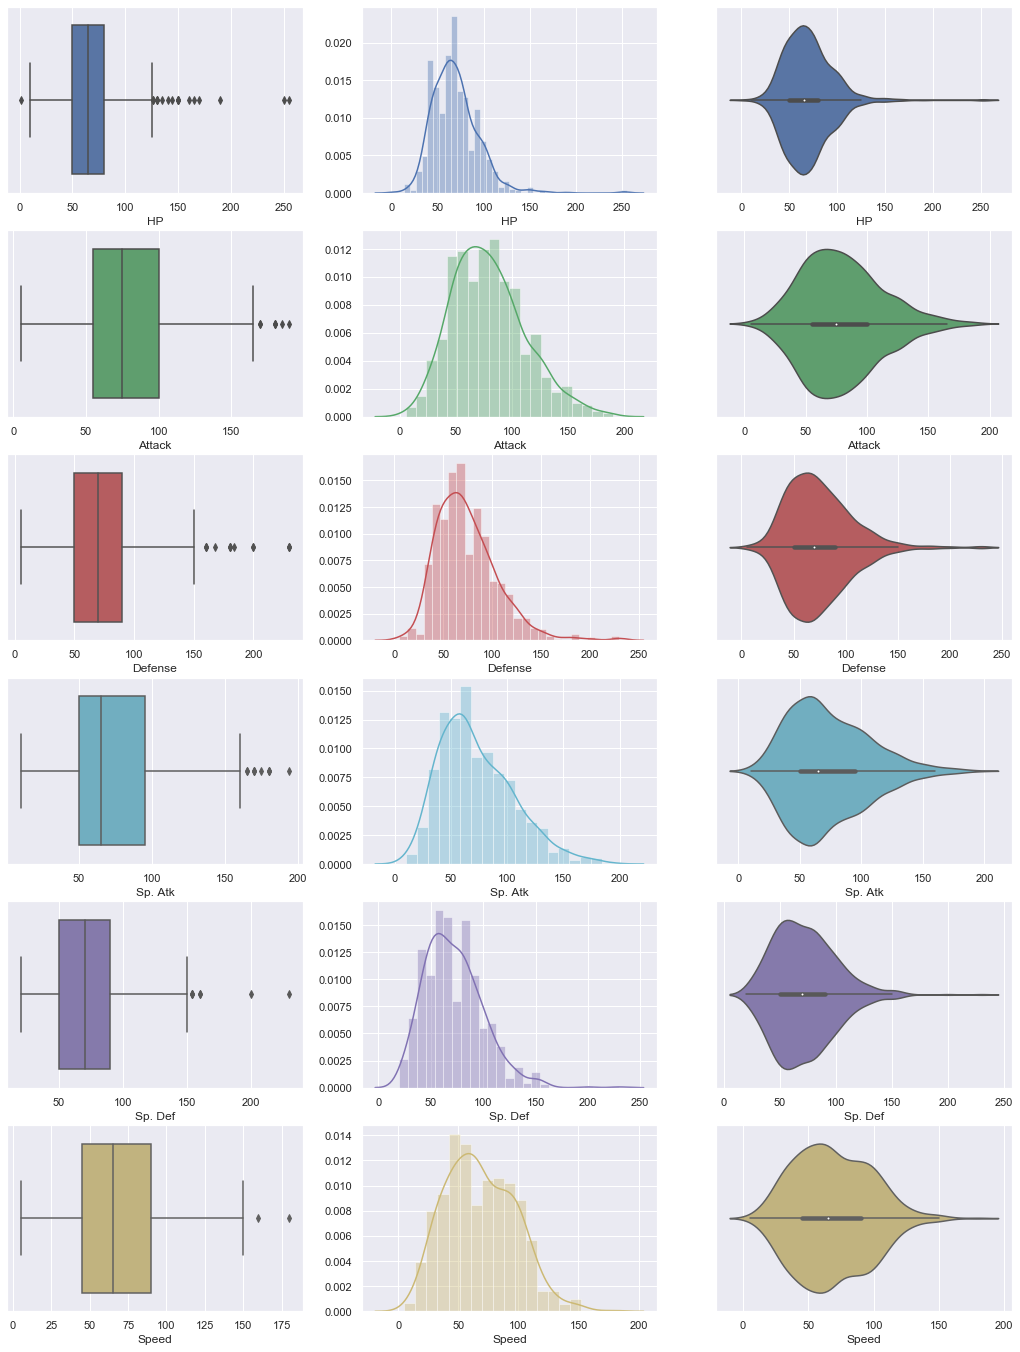

In [6]:
# Visualize the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))
color_list = ["b", "g", "r", "c", "m", "y"]

count = 0
for var in numDF:
    sb.boxplot(numDF[var], ax = axes[count,0], color = color_list[count])
    sb.distplot(numDF[var], ax = axes[count,1], color = color_list[count])
    sb.violinplot(numDF[var], ax = axes[count,2], color = color_list[count])
    count += 1

               HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
HP       1.000000  0.422386  0.239622  0.362380  0.378718  0.175952
Attack   0.422386  1.000000  0.438687  0.396362  0.263990  0.381240
Defense  0.239622  0.438687  1.000000  0.223549  0.510747  0.015227
Sp. Atk  0.362380  0.396362  0.223549  1.000000  0.506121  0.473018
Sp. Def  0.378718  0.263990  0.510747  0.506121  1.000000  0.259133
Speed    0.175952  0.381240  0.015227  0.473018  0.259133  1.000000


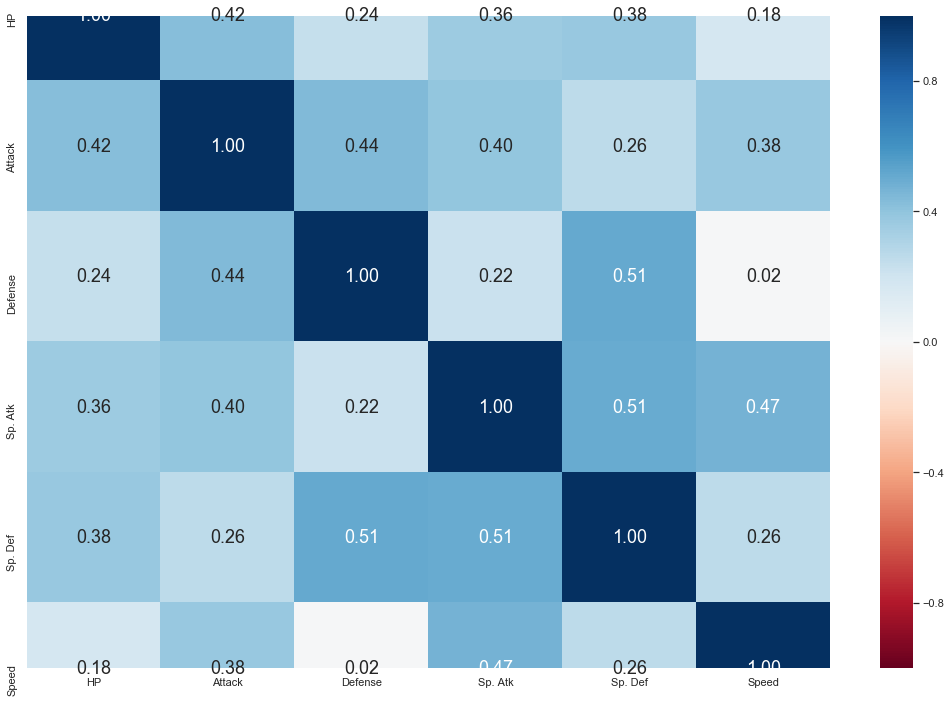

In [7]:
# Correlation Matrix
print(numDF.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(18, 12))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

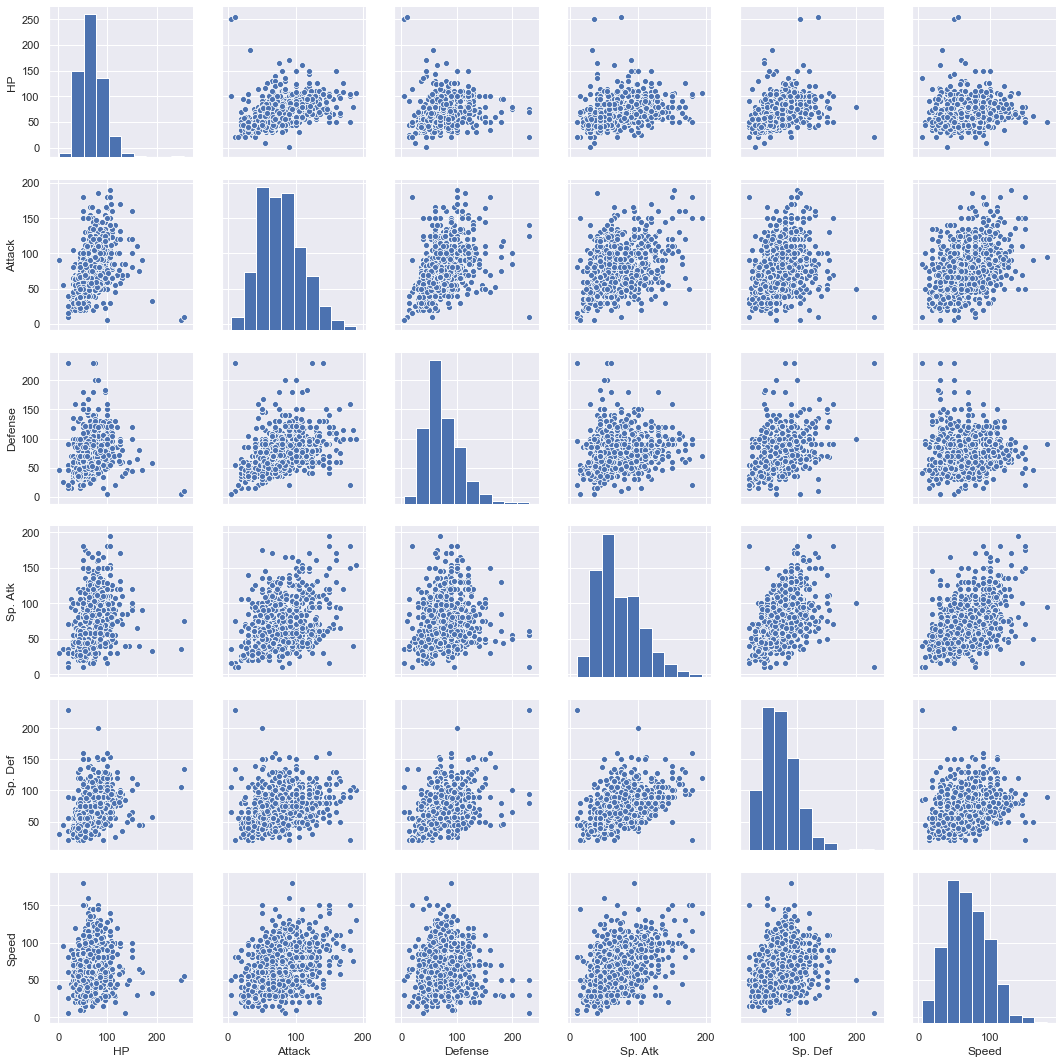

In [8]:
# Draw pairs of variables against one another
sb.pairplot(data = numDF)

### Statistics on Categorical Variables

You may also want to check the basic statistical descriptions and visualize the corresponding statistical plots for the *Categorical Variables*.

Number of Generations : 6
1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64


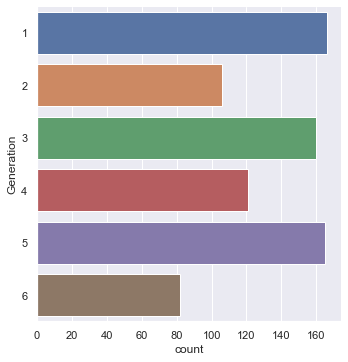

In [9]:
# Generations in the Dataset
print("Number of Generations :", len(pkmndata["Generation"].unique()))

# Pokemons in each Generation
print(pkmndata["Generation"].value_counts())
sb.catplot(y = "Generation", data = pkmndata, kind = "count")

Number of Primary Types : 18
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ghost        32
Dragon       32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


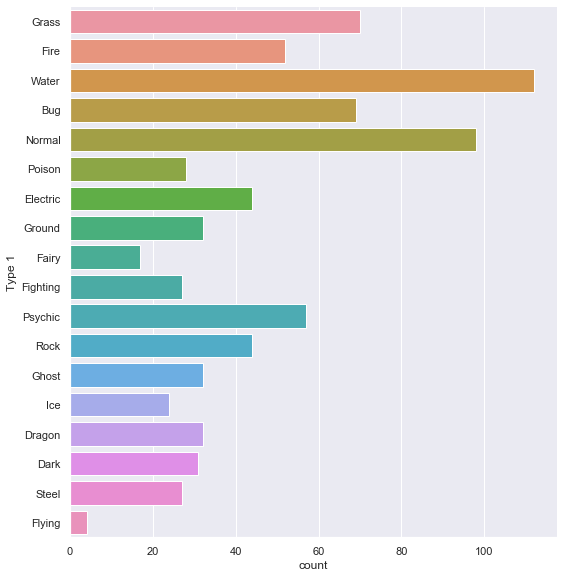

In [10]:
# Primary Types in the Dataset
print("Number of Primary Types :", len(pkmndata["Type 1"].unique()))

# Pokemons of each Primary Type
print(pkmndata["Type 1"].value_counts())
sb.catplot(y = "Type 1", data = pkmndata, kind = "count", height = 8)

Number of Secondary Types : 18
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ghost       14
Water       14
Rock        14
Ice         14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64


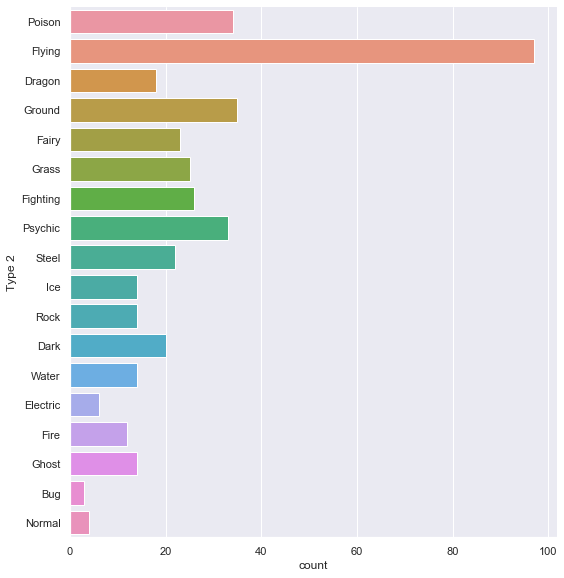

In [11]:
# Secondary Types in the Dataset
print("Number of Secondary Types :", len(pkmndata["Type 2"].dropna().unique()))

# Pokemons of each Secondary Type
print(pkmndata["Type 2"].dropna().value_counts())
sb.catplot(y = "Type 2", data = pkmndata, kind = "count", height = 8)

#### Quick Tasks

- Do a similar exploration on the Kaggle Housing Prices dataset : https://www.kaggle.com/c/house-prices-advanced-regression-techniques

---

## Exploring JSON Files

If the dataset is in a standard JSON format, we may use the `read_json` function from Pandas. JSON is also a quite common data type in practice.    

In [12]:
# Importing JSON files
cuisdata = pd.read_json('cuisineData.json')
cuisdata.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


Description of the dataset, as available on Kaggle, is as follows.
Learn more : https://www.kaggle.com/c/whats-cooking

> **id** : ID for each Recipe     
> **cuisine** : Type of Cuisine      
> **ingredients** : the list of ingredients of each recipe (of variable length)     

One such example is as follows. I have no clue what the dish is! Let me know if you can guess. ;-)

    {
        "id": 24717,
        "cuisine": "indian",
        "ingredients": [
                        "tumeric",
                        "vegetable stock",
                        "tomatoes",
                        "garam masala",
                        "naan",
                        "red lentils",
                        "red chili peppers",
                        "onions",
                        "spinach",
                        "sweet potatoes"
                       ]
    }

In [13]:
# Check the Data Type
print("Data type : ", type(cuisdata))
print("Data dims : ", cuisdata.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (39774, 3)


In [14]:
# Extract a single row
cuisdata.iloc[0]

id                                                         10259
cuisine                                                    greek
ingredients    [romaine lettuce, black olives, grape tomatoes...
Name: 0, dtype: object

In [15]:
# Extract a single column
cuisdata["ingredients"]

0        [romaine lettuce, black olives, grape tomatoes...
1        [plain flour, ground pepper, salt, tomatoes, g...
2        [eggs, pepper, salt, mayonaise, cooking oil, g...
3                      [water, vegetable oil, wheat, salt]
4        [black pepper, shallots, cornflour, cayenne pe...
                               ...                        
39769    [light brown sugar, granulated sugar, butter, ...
39770    [KRAFT Zesty Italian Dressing, purple onion, b...
39771    [eggs, citrus fruit, raisins, sourdough starte...
39772    [boneless chicken skinless thigh, minced garli...
39773    [green chile, jalapeno chilies, onions, ground...
Name: ingredients, Length: 39774, dtype: object

In [16]:
# Extract a single element
cuisdata.loc[0, "ingredients"]

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

#### Quick Tasks

- Create a new column `ingredient_string` by joining all ingredients of each recipe together into a single string.    

---

## Exploring HTML Tables

In [17]:
# Importing HTML file from the URL
html_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_actors_with_two_or_more_Academy_Awards_in_acting_categories')

In [18]:
# Check the dataset you imported
print("Data type : ", type(html_data))
print("HTML tables : ", len(html_data))

Data type :  <class 'list'>
HTML tables :  2


In [19]:
# Check the individual tables
html_data[0]

,Actor/Actress,Best Actor/Actress Awards,Best Supporting Actor/Actress Awards,Total awards,Total nominations
0,Katharine Hepburn †,Morning Glory (1933) Guess Who's Coming to Din...,NaN,4,12
1,Meryl Streep,Sophie's Choice (1982) The Iron Lady (2011),Kramer vs. Kramer (1979),3,21
2,Jack Nicholson,One Flew Over the Cuckoo's Nest (1975) As Good...,Terms of Endearment (1983),3,12
3,Ingrid Bergman †,Gaslight (1944) Anastasia (1956),Murder on the Orient Express (1974),3,7
4,Daniel Day-Lewis,My Left Foot (1989) There Will Be Blood (2007)...,NaN,3,6
5,Walter Brennan †,NaN,Come and Get It (1936) Kentucky (1938) The Wes...,3,4
6,Bette Davis †,Dangerous (1935) Jezebel (1938),NaN,2,11
7,Spencer Tracy †,Captains Courageous (1937) Boys Town (1938),NaN,2,9
8,Marlon Brando †,On the Waterfront (1954) The Godfather (1972),NaN,2,8
9,Jack Lemmon †,Save the Tiger (1973),Mister Roberts (1955),2,8


In [20]:
# Save the table as Pandas Dataframe
awardsDF = pd.DataFrame(html_data[0])
awardsDF.head()

,Actor/Actress,Best Actor/Actress Awards,Best Supporting Actor/Actress Awards,Total awards,Total nominations
0,Katharine Hepburn †,Morning Glory (1933) Guess Who's Coming to Din...,NaN,4,12
1,Meryl Streep,Sophie's Choice (1982) The Iron Lady (2011),Kramer vs. Kramer (1979),3,21
2,Jack Nicholson,One Flew Over the Cuckoo's Nest (1975) As Good...,Terms of Endearment (1983),3,12
3,Ingrid Bergman †,Gaslight (1944) Anastasia (1956),Murder on the Orient Express (1974),3,7
4,Daniel Day-Lewis,My Left Foot (1989) There Will Be Blood (2007)...,NaN,3,6


In [21]:
# Check the statistics for Total awards
awardsDF['Total awards'].describe()

count    43.000000
mean      2.162791
std       0.432613
min       2.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       4.000000
Name: Total awards, dtype: float64

In [22]:
# Check the statistics for Total nominations
awardsDF['Total nominations'].describe()

count    43.000000
mean      5.627907
std       3.552486
min       2.000000
25%       3.000000
50%       5.000000
75%       7.000000
max      21.000000
Name: Total nominations, dtype: float64

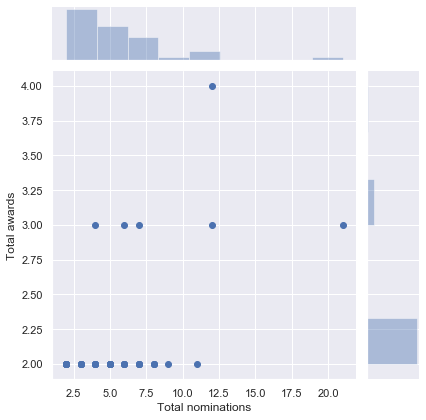

In [23]:
# Check the relationship between nominations and awards
sb.jointplot(x = awardsDF['Total nominations'], y = awardsDF['Total awards'])

#### Quick Tasks

- Do a similar analysis on the Olympic 2016 medals : https://en.wikipedia.org/wiki/2016_Summer_Olympics_medal_table